# PINN (single)

In [ ]:
from setproctitle import setproctitle
setproctitle("PINN (single)")

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "2"

import time
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path

## HMI

In [ ]:
# b_bottom_path = os.path.expanduser('~/workspace/_data/NOAA12673/b_bottom/b_bottom_20170904_000000.npy')
# Nz = 160
# spatial_norm = 160
# b_norm = 2500

# b_bottom_date = os.path.basename(b_bottom_path)[9:-4]
# output_path = os.path.join(Path(b_bottom_path).parent.parent, f'PINN/{b_bottom_date}')


## LowLou

In [ ]:
b_bottom_path = os.path.expanduser('~/workspace/_data/lowlou_64_64_64/b_bottom.npy')
Nz = 64
spatial_norm = 32
b_norm = 100

output_path = os.path.join(Path(b_bottom_path).parent, 'PINN')

In [ ]:
with open(b_bottom_path, 'rb') as f:
    b_bottom = np.load(f)

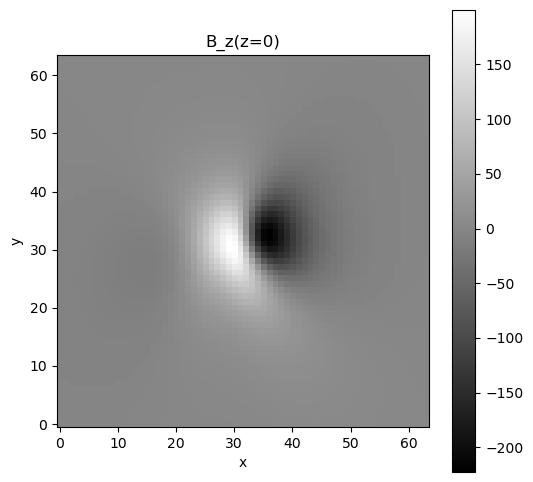

In [ ]:
plt.close()
fig, ax = plt.subplots(figsize=(6,6))
CS = plt.imshow(b_bottom[:, :, 2].transpose(), origin='lower', cmap='gray')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("B_z(z=0)")
fig.colorbar(CS)
plt.show()

In [ ]:
Nx, Ny, _ = b_bottom.shape

In [ ]:
total_iterations = 10000
log_interval = 1000

num_neurons = 256
num_layers = 8

w_ff = 1
w_div = 1
w_bc_init = 1000
decay_iterations = 25000

lr_init = 5e-4
lr_final = 5e-5
lr_decay_iterations = 50000

batch_size = 10000
num_worker = 2

In [ ]:
from cmspinn.pinn_nf2_old import NF2Trainer

In [ ]:
trainer = NF2Trainer(output_path, b_bottom, Nz, spatial_norm, b_norm,
                     meta_info=None, dim=num_neurons,
                     positional_encoding=False,
                     use_potential_boundary=True, w_div=w_div, w_ff=w_ff,
                     decay_iterations=decay_iterations, meta_path=None,
                     use_vector_potential=False, work_directory=None)

Potential Boundary: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


In [ ]:
start = time.time()

trainer.train(total_iterations, batch_size, log_interval, log_interval, num_workers=num_worker)

runtime = time.time() - start
print(f'Runtime --> total: {runtime:.2f}sec ({(runtime/(total_iterations-1)*1000):.2f}ms/iter.)')

Training:   0%|          | 3/10000 [00:01<1:23:28,  2.00it/s]

[Iteration 000000/010000] [loss: 195.00177002] [loss_bc: 195.00177002; loss_div: 0.00000129; loss_ff: 0.00000311] [w_bc: 1000.000000, LR: 0.000500]


Training:  10%|█         | 1001/10000 [01:13<11:19, 13.25it/s]

[Iteration 001000/010000] [loss: 4.84030581] [loss_bc: 1.99159241; loss_div: 1.21492159; loss_ff: 1.63379204] [w_bc: 758.787207, LR: 0.000397]


Training:  20%|██        | 2001/10000 [02:26<10:07, 13.18it/s]

[Iteration 002000/010000] [loss: 1.33221436] [loss_bc: 0.93782890; loss_div: 0.24906527; loss_ff: 0.14532016] [w_bc: 575.598959, LR: 0.000316]


Training:  30%|███       | 3001/10000 [03:39<08:51, 13.17it/s]

[Iteration 003000/010000] [loss: 0.27613246] [loss_bc: 0.18851355; loss_div: 0.06083898; loss_ff: 0.02677995] [w_bc: 436.636463, LR: 0.000251]


Training:  40%|████      | 4001/10000 [04:51<07:33, 13.24it/s]

[Iteration 004000/010000] [loss: 0.13295683] [loss_bc: 0.08543585; loss_div: 0.03226201; loss_ff: 0.01525897] [w_bc: 331.222629, LR: 0.000199]


Training:  50%|█████     | 5001/10000 [06:04<06:20, 13.12it/s]

[Iteration 005000/010000] [loss: 0.09562775] [loss_bc: 0.06601047; loss_div: 0.02072063; loss_ff: 0.00889665] [w_bc: 251.258059, LR: 0.000158]


Training:  60%|██████    | 6001/10000 [07:17<05:05, 13.10it/s]

[Iteration 006000/010000] [loss: 0.06026868] [loss_bc: 0.03463899; loss_div: 0.01884196; loss_ff: 0.00678773] [w_bc: 190.598729, LR: 0.000126]


Training:  70%|███████   | 7001/10000 [08:30<03:46, 13.23it/s]

[Iteration 007000/010000] [loss: 0.03719623] [loss_bc: 0.02068320; loss_div: 0.01150727; loss_ff: 0.00500576] [w_bc: 144.583922, LR: 0.000100]


Training:  80%|████████  | 8001/10000 [09:43<02:31, 13.23it/s]

[Iteration 008000/010000] [loss: 0.03029477] [loss_bc: 0.01682233; loss_div: 0.00913010; loss_ff: 0.00434234] [w_bc: 109.678121, LR: 0.000079]


Training:  90%|█████████ | 9001/10000 [10:56<01:19, 12.60it/s]

[Iteration 009000/010000] [loss: 0.02237272] [loss_bc: 0.01008302; loss_div: 0.00797954; loss_ff: 0.00431016] [w_bc: 83.199363, LR: 0.000063]


Training: 100%|██████████| 10000/10000 [12:09<00:00, 13.70it/s]

[Iteration 010000/010000] [loss: 0.01596134] [loss_bc: 0.00697218; loss_div: 0.00570284; loss_ff: 0.00328632] [w_bc: 63.113171, LR: 0.000050]
[Iteration 010000/010000] [loss: 0.01596134] [loss_bc: 0.00697025; loss_div: 0.00570284; loss_ff: 0.00328632] [w_bc: 63.095734, LR: 0.000050]
Runtime --> total: 730.12sec (73.02ms/iter.)


In [ ]:
with open(os.path.join(output_path, 'losses.npy'), "rb") as f:
    losses = np.load(f)

Text(0, 0.5, 'Loss')

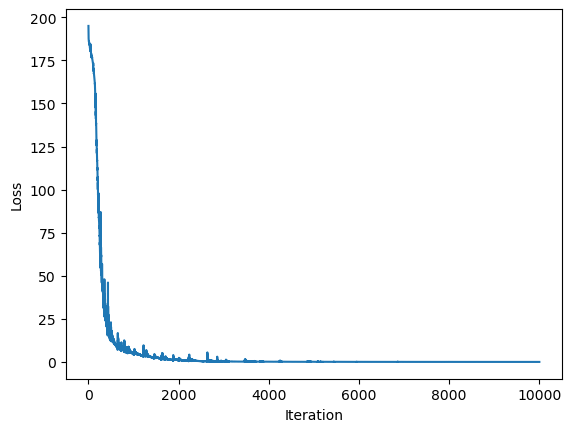

In [ ]:
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')

In [ ]:
with open(os.path.join(output_path, 'losses_no_weight.npy'), "rb") as f:
    losses_no_weight = np.load(f)

Text(0, 0.5, 'Loss (no weight)')

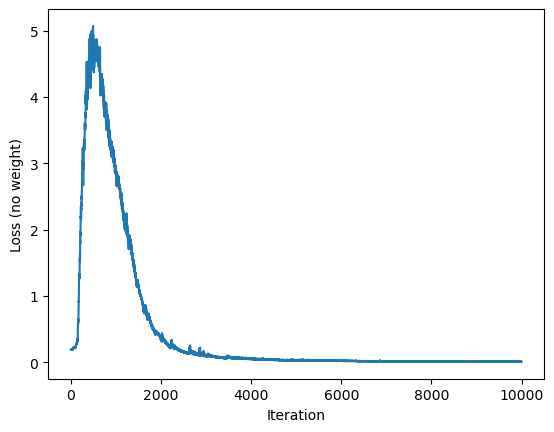

In [ ]:
plt.plot(losses_no_weight)
plt.xlabel('Iteration')
plt.ylabel('Loss (no weight)')